In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
data = pd.concat([train_df, test_df])

In [3]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [4]:
#first 2 useless features removed
data = data.drop(data.iloc[:, [0,1]], axis=1)


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

In [6]:
# Mapping categorical features of type 'object' to numerical values
categorical_mappings = {
    'Gender': {'Female': 0, 'Male': 1},
    'Customer Type': {'disloyal Customer': 0, 'Loyal Customer': 1},
    'Type of Travel': {'Personal Travel': 0, 'Business travel': 1},
    'Class': {'Eco': 0, 'Eco Plus': 1, 'Business': 2}
}

for col, mapping in categorical_mappings.items():
    data[col] = data[col].map(mapping).astype(int)



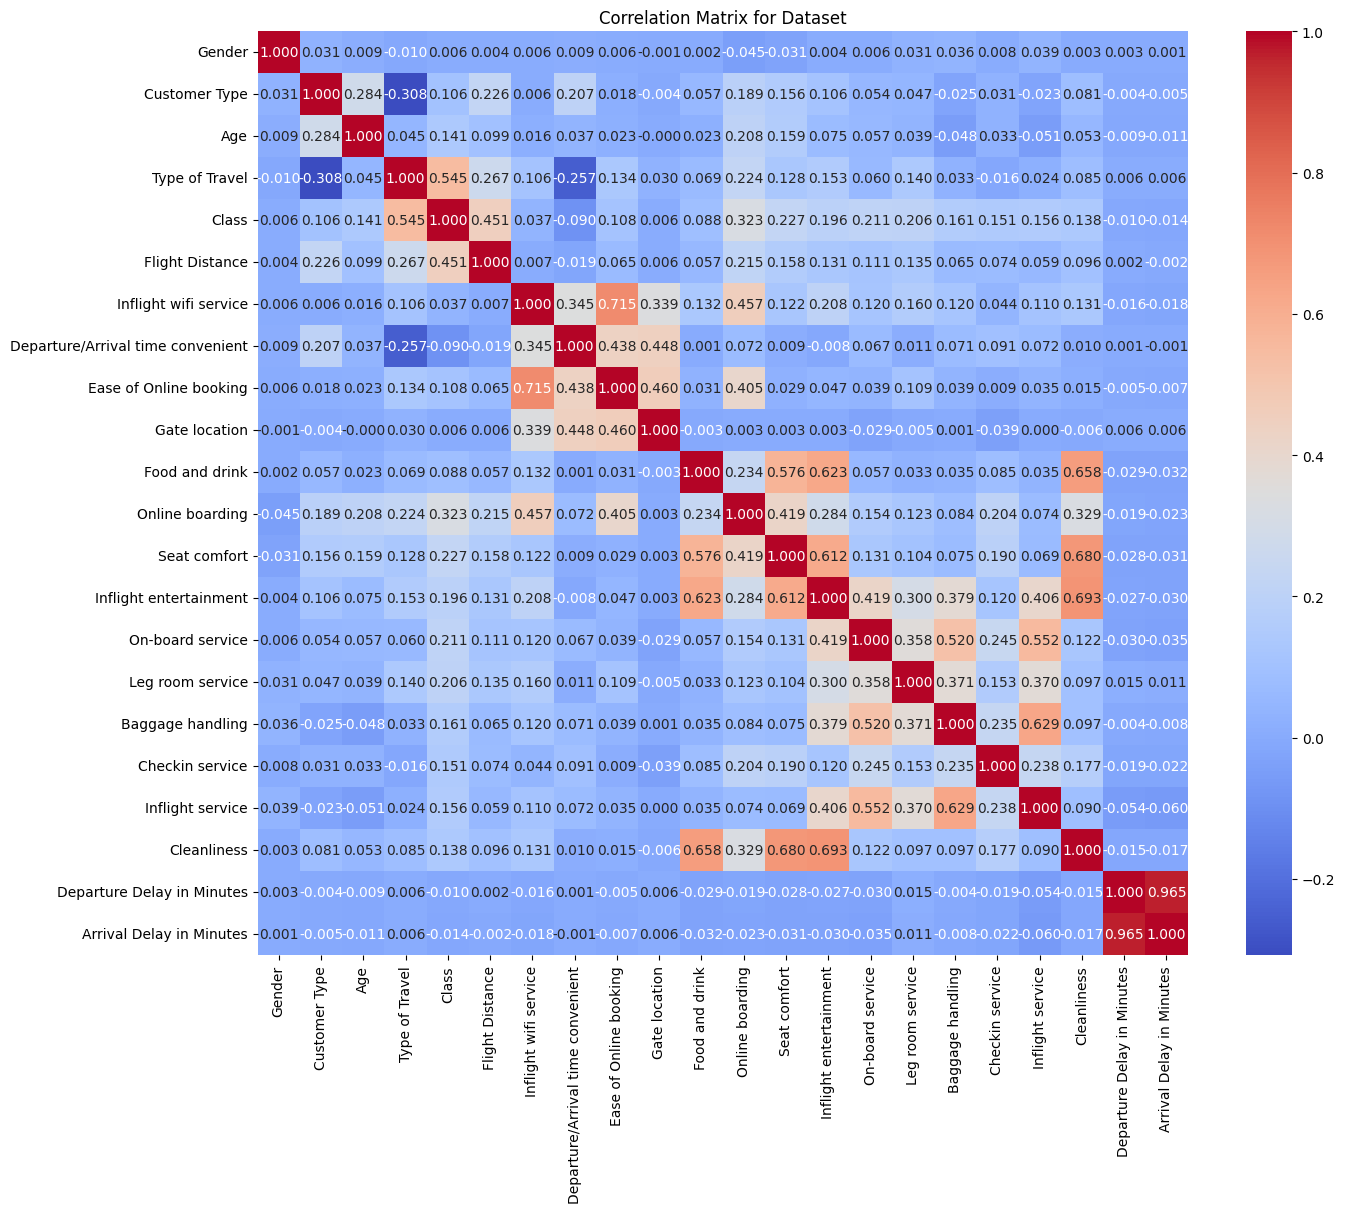

In [7]:
corr_mat = data.corr(numeric_only=True, method="pearson")
 #Correlation
plt.figure(figsize=(15,12))
sns.heatmap(data=corr_mat, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Matrix for Dataset")
plt.show()

In [8]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965291
Inflight wifi service       Ease of Online booking      0.714807
Inflight entertainment      Cleanliness                 0.692511
Seat comfort                Cleanliness                 0.679613
Food and drink              Cleanliness                 0.658054
Baggage handling            Inflight service            0.629237
Food and drink              Inflight entertainment      0.623461
Seat comfort                Inflight entertainment      0.611837
Food and drink              Seat comfort                0.575846
On-board service            Inflight service            0.551569
Type of Travel              Class                       0.545447
On-board service            Baggage handling            0.520296
dtype: float64

In [9]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr(numeric_only=True)
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

correlation_for_dropping(train_df, 0.5)

{'Arrival Delay in Minutes',
 'Baggage handling',
 'Cleanliness',
 'Ease of Online booking',
 'Inflight entertainment',
 'Inflight service',
 'Seat comfort'}

In [10]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class'] + data.columns[6:20].tolist()
data[categorical_cols] = data[categorical_cols].astype('category')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding                 

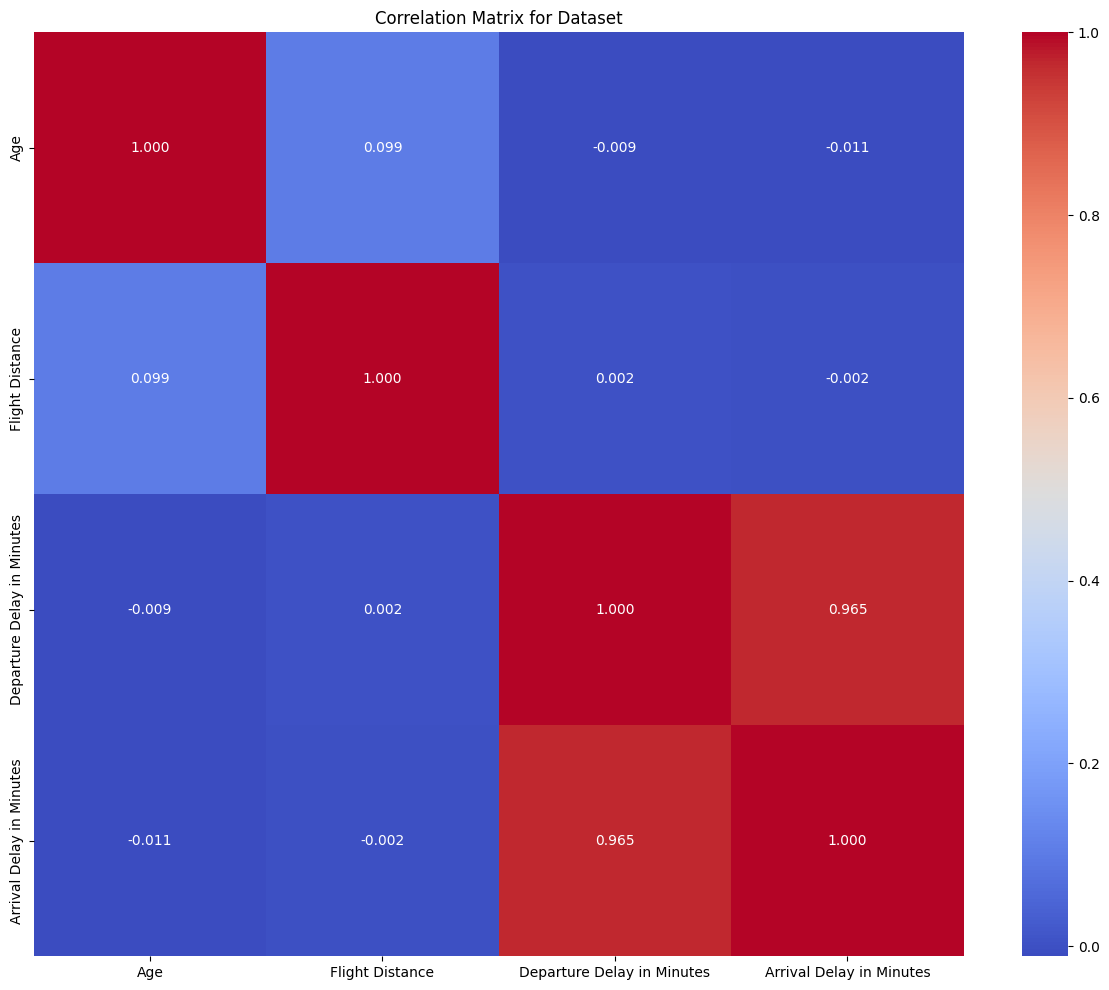

In [12]:
corr_mat = data.corr(numeric_only=True, method="pearson")
 #Correlation
plt.figure(figsize=(15,12))
sns.heatmap(data=corr_mat, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Matrix for Dataset")
plt.show()

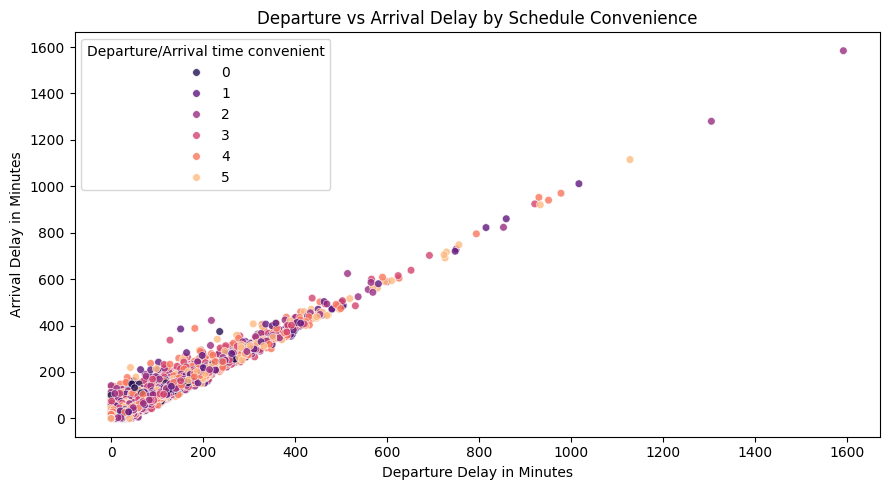

In [13]:
data.dropna(inplace=True)
plt.figure(figsize=(9, 5))
sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',
                hue='Departure/Arrival time convenient', palette='magma', alpha=0.8, s=30)
plt.title('Departure vs Arrival Delay by Schedule Convenience')
plt.tight_layout()
plt.show()